# PART 1: DEPENDENCIES AND LOADING DATA

In [27]:
# Import our dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

In [28]:
# Reading CSV file from the Resources folder into a pandas DataFrame

body_performance_df = pd.read_csv('/content/bodyPerformance.csv')
body_performance_df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


# PART 2: CLEANING DATA

In [29]:
# Datatypes
body_performance_df.dtypes

,0
age,float64
gender,object
height_cm,float64
weight_kg,float64
body fat_%,float64
diastolic,float64
systolic,float64
gripForce,float64
sit and bend forward_cm,float64
sit-ups counts,float64


In [30]:
# Unique values
body_performance_df.nunique()

,0
age,44
gender,2
height_cm,467
weight_kg,1398
body fat_%,527
diastolic,89
systolic,102
gripForce,550
sit and bend forward_cm,528
sit-ups counts,81


In [31]:
len(body_performance_df)

13393

In [32]:
# Renaming columns
body_performance_df.rename(columns={
    'age': 'Age',
    'gender': 'Gender',
    'height_cm': 'Height (cm)',
    'weight_kg': 'Weight (Kg)',
    'body fat_%': 'Body Fat %',
    'diastolic': 'Diastolic BP',
    'systolic': 'Systolic BP',
    'gripFroce': 'Grip Froce',
    'sit and bend forward_cm': 'Sit and Bend Froward (cm)',
    'sit-ups counts': 'Sit-Ups Counts',
    'broad jump_cm': 'Broad Jump (cm)',
    'class': 'Classification'
}, inplace=True)

body_performance_df.head()

,Age,Gender,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [33]:
# The values 'A' and 'B' are replaced with 0.
# The values 'C' and 'D' are replaced with 1.
body_performance_df['Classification'] = body_performance_df['Classification'].replace({'A':0, 'B':0, 'C':1 , 'D':1})
body_performance_df.head()



,Age,Gender,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0


In [34]:
# Checking female and male count for accuracy
body_performance_df['Gender'].value_counts()

,count
Gender,
M,8467
F,4926


# PART 3" CREATE LABELS SET (y) AND FEATURES (X)

In [35]:
# Creating new DataFrame for transformed non-numeric data to numeric, Boolean data.

body_performance_numeric_df = pd.get_dummies(body_performance_df, columns=['Gender'], dtype=int)

# Displaying the first few rows
body_performance_numeric_df.head()

,Age,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Classification,Gender_F,Gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,0,1


In [36]:
# Initiating the LabelEncoder

le = LabelEncoder()

# Applying LabelEncoder to the classification column (the labels)

body_performance_numeric_df['Classification'] = le.fit_transform(body_performance_numeric_df['Classification'].values)

In [37]:
# Separating data into labels and features

y = body_performance_numeric_df['Classification']

X = body_performance_numeric_df.drop(columns=['Classification'])

In [38]:

y.head()

,Classification
0,1
1,0
2,1
3,0
4,0


In [40]:
# value counts for label (y) data
y.value_counts()

,count
Classification,
1,6698
0,6695


In [41]:
X.head()

,Age,Height (cm),Weight (Kg),Body Fat %,Diastolic BP,Systolic BP,gripForce,Sit and Bend Froward (cm),Sit-Ups Counts,Broad Jump (cm),Gender_F,Gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,0,1


In [43]:
# value counts for features (X) data
X.value_counts()

Age   Height (cm)  Weight (Kg)  Body Fat %  Diastolic BP  Systolic BP  gripForce  Sit and Bend Froward (cm)  Sit-Ups Counts  Broad Jump (cm)  Gender_F  Gender_M
27.0  157.0        49.10        30.7        70.0          86.0         27.7       19.7                       51.0            167.0            1         0           2
21.0  148.0        42.00        22.8        62.0          104.0        22.4       23.8                       26.0            155.0            1         0           1
42.0  165.1        54.40        14.5        82.0          146.0        36.5       16.2                       47.0            211.0            0         1           1
      162.8        60.10        27.4        82.0          129.0        28.2       19.5                       38.0            156.0            1         0           1
      163.0        57.60        24.1        98.0          148.0        30.6       16.6                       33.0            148.0            1         0           1
                                                                                                                                                                   ..
27.0  166.4        67.70        22.2        70.0          134.0        38.2       16.6                       50.0            211.0            0         1           1
      166.5        58.50        19.7        79.0          125.0        31.4       22.0                       32.0            150.0            1         0           1
                   71.92        37.7        78.0          133.0        28.1       26.6                       40.0            161.0            1         0           1
      166.6        66.40        37.8        85.0          122.0        18.7       18.5                       15.0            132.0            1         0           1
64.0  183.5        75.40        17.2        80.0          143.0        46.5       21.0                       34.0            188.0            0         1           1
Name: count, Length: 13392, dtype: int64

# PART 4: SPLIT DATA INTO TRAINING AND TESTING SETS

In [44]:
# Splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape

(10044, 12)

# PART 5: FIT AND TRANSFORM DATA

In [45]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# PART 6: KERAS SEQUENTIAL MODEL CREATION

In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

neural_network_model = tf.keras.models.Sequential()

# First hidden layer

neural_network_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=12))

# Second hidden layer

neural_network_model.add(tf.keras.layers.Dense(units=30, activation="sigmoid"))

# Output layer

neural_network_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
neural_network_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 80)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           2,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,501 (13.68 KB)

 Trainable params: 3,501 (13.68 KB)

 Non-trainable params: 0 (0.00 B)

# PART 7: COMPILE KERAS SEQUENTIAL MODEL AND TRAIN DATASET

In [47]:
# Compile the model

neural_network_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model

fit_model = neural_network_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7429 - loss: 0.5436
Epoch 2/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8270 - loss: 0.3708
Epoch 3/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.3535
Epoch 4/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8491 - loss: 0.3416
Epoch 5/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.3268
Epoch 6/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8601 - loss: 0.3198
Epoch 7/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.3091
Epoch 8/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3098
Epoch 9/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.2937
Epoch 10/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3069
Epoch 11/100
314/314 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.2944
Epoch 12/100
314/314 ━━━━━━━━━━━━━━━━━━━━

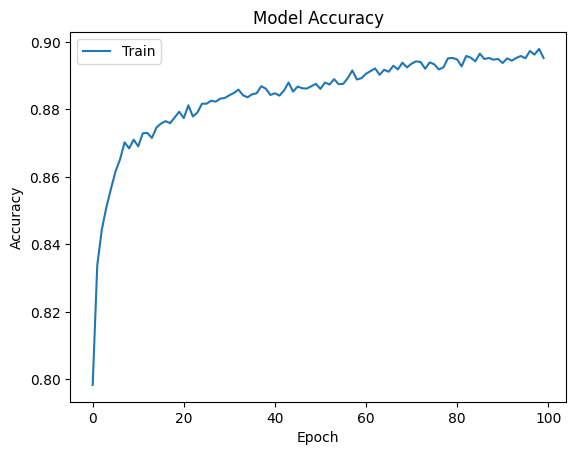

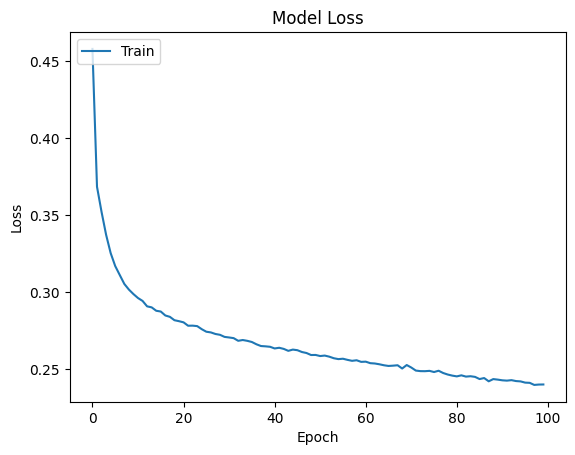

In [49]:
# Plot accuracy over epochs
plt.plot(fit_model.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(fit_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [51]:
# Evaluate the model using the test data
model_loss, model_accuracy = neural_network_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

105/105 - 0s - 2ms/step - accuracy: 0.8773 - loss: 0.2815
Loss: 0.2815314531326294, Accuracy: 0.8772767782211304
